<a href="https://colab.research.google.com/github/woodstone10/deep_learning_study-python/blob/main/Overfitting_and_Dropout_EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overfitting and Dropout

---
Reference:

https://www.youtube.com/watch?v=ARq74QuavAo

In [ ]:
import tensorflow as tf

In [ ]:
MNIST = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = MNIST.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 784).astype(float)/255
x_test = x_test.reshape(x_test.shape[0], 784).astype(float)/255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Model - overfitting

In [ ]:
model = \
    tf.keras.Sequential([
        tf.keras.layers.Dense(512, input_dim=784, activation='relu'), # input node 784 (25x25)
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax') # classify 10 classes (0~9)
    ])
model.summary()
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, 
                 validation_split=0.3, 
                 epochs=30, 
                 batch_size=200,
                 verbose=1
                 )

Epoch 1/30
210/210 [==============================] - 1s 4ms/step - loss: 0.5589 - accuracy: 0.8402 - val_loss: 0.1828 - val_accuracy: 0.9454
Epoch 2/30
210/210 [==============================] - 1s 3ms/step - loss: 0.1184 - accuracy: 0.9650 - val_loss: 0.1098 - val_accuracy: 0.9658
Epoch 3/30
210/210 [==============================] - 1s 3ms/step - loss: 0.0660 - accuracy: 0.9816 - val_loss: 0.0954 - val_accuracy: 0.9726
Epoch 4/30
210/210 [==============================] - 1s 4ms/step - loss: 0.0404 - accuracy: 0.9886 - val_loss: 0.0924 - val_accuracy: 0.9728
Epoch 5/30
210/210 [==============================] - 1s 3ms/step - loss: 0.0292 - accuracy: 0.9915 - val_loss: 0.0919 - val_accuracy: 0.9739
Epoch 6/30
210/210 [==============================] - 1s 3ms/step - loss: 0.0165 - accuracy: 0.9957 - val_loss: 0.0957 - val_accuracy: 0.9726
Epoch 7/30
210/210 [==============================] - 1s 4ms/step - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.1016 - val_accuracy: 0.9738
Epoch 

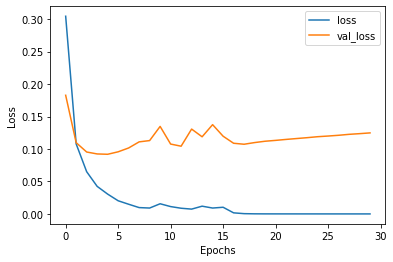

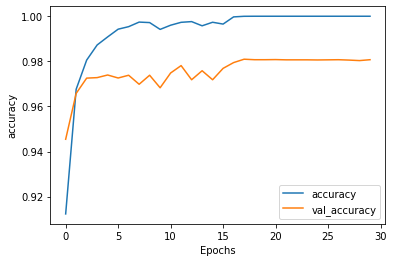

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [ ]:
model.evaluate(x_test,  y_test, verbose = 0)

[0.09274612367153168, 0.982699990272522]

## Model with Drop-out and Early-stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = \
    tf.keras.Sequential([
        tf.keras.layers.Dense(512, input_dim=784, activation='relu'), 
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),       
        tf.keras.layers.Dense(10, activation='softmax') 
    ])
model.summary()
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)]

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, 
                 validation_split=0.3, 
                 epochs=30, 
                 batch_size=200,
                 verbose=1,
                 callbacks=callbacks
                 )

Epoch 1/30
210/210 [==============================] - 1s 4ms/step - loss: 0.6996 - accuracy: 0.7815 - val_loss: 0.1554 - val_accuracy: 0.9536
Epoch 2/30
210/210 [==============================] - 1s 4ms/step - loss: 0.1642 - accuracy: 0.9516 - val_loss: 0.1143 - val_accuracy: 0.9656
Epoch 3/30
210/210 [==============================] - 1s 4ms/step - loss: 0.1074 - accuracy: 0.9664 - val_loss: 0.1073 - val_accuracy: 0.9682
Epoch 4/30
210/210 [==============================] - 1s 4ms/step - loss: 0.0857 - accuracy: 0.9748 - val_loss: 0.0914 - val_accuracy: 0.9736
Epoch 5/30
210/210 [==============================] - 1s 3ms/step - loss: 0.0669 - accuracy: 0.9785 - val_loss: 0.0955 - val_accuracy: 0.9737
Epoch 6/30
210/210 [==============================] - 1s 4ms/step - loss: 0.0558 - accuracy: 0.9819 - val_loss: 0.0787 - val_accuracy: 0.9769
Epoch 7/30
210/210 [==============================] - 1s 4ms/step - loss: 0.0470 - accuracy: 0.9860 - val_loss: 0.0803 - val_accuracy: 0.9772
Epoch 

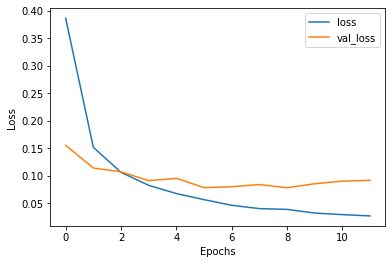

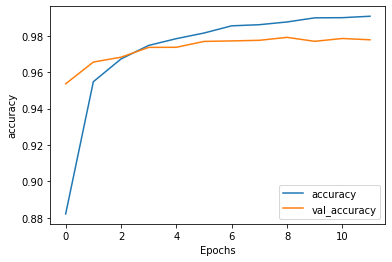

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [ ]:
model.evaluate(x_test,  y_test, verbose = 0)

[0.07398425787687302, 0.9803000092506409]